# THỰC HÀNH CLUSTERING

#### Hoàng Ngọc Thạch - MSSV: 14520811

#### Bài thực hành clustering. 

## Bài tập 2: Hand-writen digits

In [3]:
# Import library
from sklearn.cluster import KMeans
import sklearn.datasets as datasets
import pandas as pd

In [4]:
# Load dataset
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


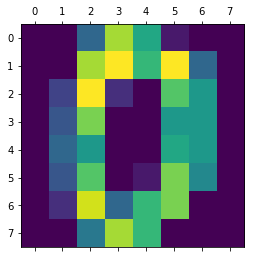

In [5]:
# Import matplotlib to show data
import matplotlib.pyplot as plt
%matplotlib inline
#plt.gray()
plt.matshow(digits.images[0])

#### Training using digits.data (feature of image)

In [6]:
# Apply KMeans clustering to data
number_clusters = 10

#create KMeans model
model = KMeans(n_clusters=number_clusters)

# fit model to data and predict on this data
label_kmean = model.fit_predict(digits.data)


In [7]:
# create a DataFrame with labels and truth lables of digits data
df = pd.DataFrame({'labels': label_kmean, 'Truth_labels': digits.target})

In [8]:
# Create a cross-tablutation
ct = pd.crosstab(df['labels'], df['Truth_labels'])

print(ct)

Truth_labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0  55    2    0    5    0    1    0    5   20
1               0  24  148    0    0    0    0    0    3    0
2             177   0    1    0    0    0    1    0    0    0
3               0   2    0    0    0    1  177    0    2    0
4               0   1   13  154    0    2    0    0    2    7
5               0  99    8    7    4    0    2    2  100    2
6               0   1    0    2    0  136    0    0    4    4
7               0   0    3    7    8    0    0  177    5    8
8               0   0    2   13    0   41    0    0   53  139
9               1   0    0    0  164    2    0    0    0    0


### Clustering Center

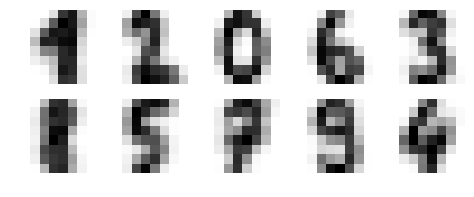

In [9]:
# create a fig to show image
fig = plt.figure(figsize=(8,3))

# for all 0-9 labels
for i in range(10):
    # initialize subplots in a grid 2x5 at i+1th position
    ax = fig.add_subplot(2, 5, 1+i)
    
    # display image
    ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary)
    
    #don't show the axes
    plt.axis('off')

plt.show()

### Visualization cluster by t-SNE

In [10]:
from sklearn.manifold import TSNE

TSNE_model = TSNE(learning_rate=100)

new_features = TSNE_model.fit_transform(digits.data)




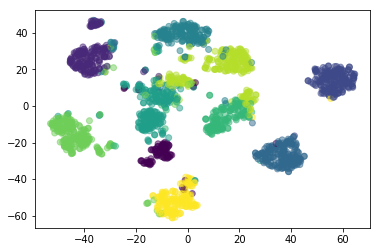

In [11]:
xs = new_features[:,0]
ys = new_features[:,1]

plt.scatter(xs,ys,c=label_kmean, alpha=0.5)
plt.show()

### Visualization Cluster by PCA

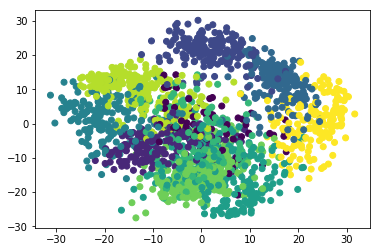

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(digits.data)


plt.scatter(pca[:,0], pca[:,1], c=label_kmean)

plt.show()

### Spectral Clustering


In [13]:
# import library
from sklearn.cluster import spectral_clustering
from sklearn.metrics.pairwise import cosine_similarity 

- Tính ma trận tương đồng giữa các sample
- Áp dụng thuật toán spectral_clustering trên ma trận tương đồng vừa tính.

In [14]:
graph = cosine_similarity(digits.data)
label_spectral = spectral_clustering(graph, n_clusters=10)

- Cross-table 

In [15]:
# create a DataFrame with labels and truth lables of digits data
df = pd.DataFrame({'labels': label_spectral, 'Truth_labels': digits.target})

# Create a cross-tablutation
ct = pd.crosstab(df['labels'], df['Truth_labels'])

print(ct)

Truth_labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0   0    2    2   11    0    0  154    3    2
1             177   0    1    0    1    1    0    0    0    3
2               0  58    5    5    1    0    0   15   40   35
3               0   0    1  146    0    0    0    0    6    2
4               1   0    0    0  163    2    0    0    0    0
5               0  86   53    5    5    0    6   10  101    1
6               0   2    0    1    0    2  172    0   13    0
7               0   0    0   16    0   20    3    0    7  134
8               0  36  115    4    0    0    0    0    1    0
9               0   0    0    4    0  157    0    0    3    3


### Cluster by DBSCAN

In [25]:
eps, min_samples = 0.0595 , 10

#import DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')

label_dbscan = dbscan.fit_predict(digits.data)

# print cross-table
df_dbscan = pd.DataFrame({'labels':label_dbscan,'Truth labels':digits.target})
ct_dbscan=pd.crosstab(df_dbscan['labels'],df_dbscan['Truth labels'])
print(ct_dbscan)

Truth labels    0    1    2    3    4   5    6    7   8    9
labels                                                      
-1              7   13   41   49   35  68    5   52  81   78
 0            171    0    0    0    0   0    0    0   0    0
 1              0  143    0    0    0   0    1    0  93    1
 2              0    0    0    0    0   0  175    0   0    0
 3              0    0    0  134    0   1    0    0   0  101
 4              0    0    0    0  146   0    0    0   0    0
 5              0    0  136    0    0   0    0    0   0    0
 6              0    0    0    0    0  65    0    0   0    0
 7              0    0    0    0    0   0    0  127   0    0
 8              0    0    0    0    0  48    0    0   0    0
 9              0   26    0    0    0   0    0    0   0    0


### Visualize kết quả của 2 thuật toán phân lớp: KMean và Spectral Clustering

- Sử dụng thuật toán PCA để giảm số chiều features.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(digits.data)

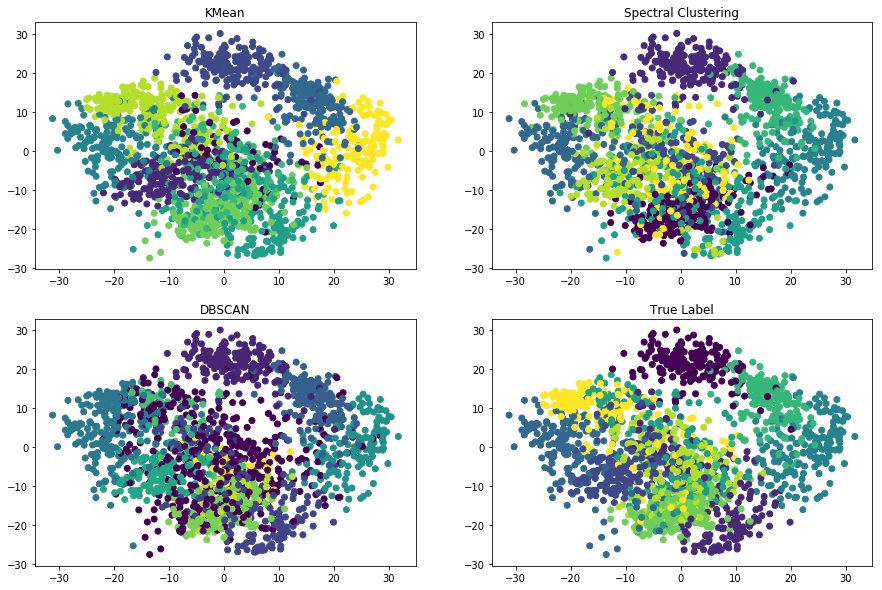

In [29]:
# create a fig to show image
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)

ax.scatter(pca[:,0],pca[:,1], c=label_kmean)
ax.set_title('KMean')

ax = fig.add_subplot(2, 2, 2)
ax.scatter(pca[:,0],pca[:,1], c=label_spectral)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(2, 2, 3)
ax.scatter(pca[:,0],pca[:,1], c=label_dbscan)
ax.set_title('DBSCAN')

ax = fig.add_subplot(2, 2, 4)
ax.scatter(pca[:,0],pca[:,1], c=digits.target)
ax.set_title('True Label')


plt.show()

## Evaluate clustering algorithm

- Sử dụng các hệ đo lường để đánh giá thuật toán: Homogeneity, Completeness, V-measure, Adjusted Random, Adjusted Mutual Information.

In [18]:
# import library
from sklearn.metrics import adjusted_mutual_info_score


In [26]:
print("KMean:",adjusted_mutual_info_score(digits.target, label_kmean))
print("Spectral:",adjusted_mutual_info_score(digits.target, label_spectral))
print("DBSCAN:",adjusted_mutual_info_score(digits.target, label_dbscan))

KMean: 0.738531900202
Spectral: 0.70855128883
DBSCAN: 0.699846081661
